## This Notebook is created for Testing 100 records datasets

## Import all the required packages/libraries 

In [1]:
#reusing the Bloom filter codes
!pip install bitarray
import BF_encoding
import pandas as pd
import time 

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from statistics import mean
from bitarray import bitarray
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 8.9 MB/s 
29 30 0.95 0.9201101928374655
dinusha vinusha 0.8333333333333334 0.8717948717948718
female female 1.0 1.0
99 1 0.85 0.8092105263157895
99 1 0.0 0.5740181268882175


In [2]:
#initialisng bloom filter object
bf_len = 50 #Bloom filter length
bf_num_hash_func = 2 #Number of hash functions
bf_num_inter = 5 #Number of intervals to use for BF based similarities
bf_step = 1 # 
max_abs_diff = 20 #Maximum absolute difference allowed
min_val = 0 #Minimum value
max_val = 100 #Maximum value
q = 2 #Length of sub-strings/q-grams

In [3]:
bf = BF_encoding.BF(bf_len, bf_num_hash_func, bf_num_inter, bf_step,
          max_abs_diff, min_val, max_val, q)

------------------------------------------------------------------------------------------------------

# Create a dictionary of first 3 raw datasets 


In [4]:
rec_db1 = bf.__read_csv_file__('ncvr_numrec_100_modrec_2_ocp_0_myp_0_nump_5.csv',True, None)
rec_db2 = bf.__read_csv_file__('ncvr_numrec_100_modrec_2_ocp_0_myp_1_nump_5.csv',True, None)
rec_db3 = bf.__read_csv_file__('ncvr_numrec_100_modrec_2_ocp_0_myp_2_nump_5.csv',True, None)
rec_db4 = bf.__read_csv_file__('ncvr_numrec_100_modrec_2_ocp_0_myp_3_nump_5.csv',True, None)
rec_db5 = bf.__read_csv_file__('ncvr_numrec_100_modrec_2_ocp_0_myp_4_nump_5.csv',True, None)
#rec_db6 = bf.__read_csv_file__('ncvr_numrec_5000_modrec_2_ocp_20_myp_0_nump_5.csv',True, None)
#rec_db7 = bf.__read_csv_file__('ncvr_numrec_5000_modrec_2_ocp_20_myp_1_nump_5.csv',True, None)
#rec_db8 = bf.__read_csv_file__('ncvr_numrec_5000_modrec_2_ocp_20_myp_2_nump_5.csv',True, None)
#rec_db9 = bf.__read_csv_file__('ncvr_numrec_5000_modrec_2_ocp_20_myp_3_nump_5.csv',True, None)
#rec_db10 = bf.__read_csv_file__('ncvr_numrec_5000_modrec_2_ocp_20_myp_4_nump_5.csv',True, None)
#rec_db11 = bf.__read_csv_file__('ncvr_numrec_5000_modrec_2_ocp_40_myp_0_nump_5.csv',True, None)
#rec_db12 = bf.__read_csv_file__('ncvr_numrec_5000_modrec_2_ocp_40_myp_1_nump_5.csv',True, None)
#rec_db13 = bf.__read_csv_file__('ncvr_numrec_5000_modrec_2_ocp_40_myp_2_nump_5.csv',True, None)
#rec_db14 = bf.__read_csv_file__('ncvr_numrec_5000_modrec_2_ocp_40_myp_3_nump_5.csv',True, None)
#rec_db15 = bf.__read_csv_file__('ncvr_numrec_5000_modrec_2_ocp_40_myp_4_nump_5.csv',True, None)

In [5]:
print(type(rec_db1))

<class 'dict'>


------------------------------------------------------------------------------------------------------

# Create bloom filter of the first 5 datasets
### -- using pandas as pd
### -- create a dictionary that has the combined BF from the 3 datasets

In [6]:
listBF = list() # creating a list to store hashed arrays of first 3 table only
dictBF = dict()

In [7]:
# for each record of selected csv file, use BF encoding, combine all the columns into a single array and hash it, and store 
temp1 = dict()
db1 = list()
for k, v in rec_db2.items():
  store = v[1]+ v[2]+ v[3]+ v[4]
  val2_set = [store]
  bf1 = bf.set_to_bloom_filter(val2_set)
  temp1[v[0]] = bf1 # append it into a dafarame instead of disctionary ??
  listBF.append(bf1)
  db1.append(1)

In [8]:
temp2 = dict()
db2 = list()
for k, v in rec_db2.items():
  store = v[1]+ v[2]+ v[3]+ v[4]
  val2_set = [store]
  bf2 = bf.set_to_bloom_filter(val2_set)
  temp2[v[0]] = bf2 # append it into a dafarame instead of disctionary ??
  listBF.append(bf2)
  db2.append(2)

In [9]:
temp3 = dict()
db3 = list()
for k, v in rec_db3.items():
  store = v[1]+ v[2]+ v[3]+ v[4]
  val3_set = [store]
  bf3 = bf.set_to_bloom_filter(val3_set)
  temp3[v[0]] = bf3  # append it into a dafarame instead of disctionary ??
  listBF.append(bf3)
  db3.append(3)

In [10]:
temp4 = dict()
db4 = list()
for k, v in rec_db4.items():
  store = v[1]+ v[2]+ v[3]+ v[4]
  val4_set = [store]
  bf4 = bf.set_to_bloom_filter(val4_set)
  temp4[v[0]] = bf4  # append it into a dafarame instead of disctionary ??
  db4.append(4)

In [11]:
temp5 = dict() 
db5 = list()
for k, v in rec_db5.items():
  store = v[1]+ v[2]+ v[3]+ v[4]
  val5_set = [store]
  bf5 = bf.set_to_bloom_filter(val5_set)
  temp5[v[0]] = bf5  # append it into a dafarame instead of disctionary ??
  db5.append(5)

--------------------------------------------------------------------------------

### create dataframe for a datasets with 0 OCP

In [12]:
header = ['rec_id', 'Blooom_filters']
df1 = pd.DataFrame(temp1.items(), columns= header)
df1["database_id"] = db1 #adding the database id
df1 = df1[['rec_id', "database_id",'Blooom_filters']] # rearrange the dataframe based on colunms

In [13]:
df2 = pd.DataFrame(temp2.items(), columns= header)
df2["database_id"] = db2 
df2 = df2[['rec_id', "database_id",'Blooom_filters']]

In [14]:
df3 = pd.DataFrame(temp3.items(), columns= header) 
df3["database_id"] = db3 
df3 = df3[['rec_id', "database_id",'Blooom_filters']]

In [15]:
df4 = pd.DataFrame(temp4.items(), columns= header) 
df4["database_id"] = db4 
df4 = df4[['rec_id', "database_id",'Blooom_filters']]

In [16]:
df5 = pd.DataFrame(temp5.items(), columns= header) 
df5["database_id"] = db5
df5 = df5[['rec_id', "database_id",'Blooom_filters']]

In [17]:
First3Table = pd.concat([df1, df2, df3])
First3Table.head()

,rec_id,database_id,Blooom_filters
0,04489635,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,03597241,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
2,07621378,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,05029442,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,06845956,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### create dataframe for a datasets with 0 OCP

In [18]:
header = ['rec_id', 'Blooom_filters']
df1 = pd.DataFrame(temp1.items(), columns= header)
df1["database_id"] = db1 #adding the database id
df1 = df1[['rec_id', "database_id",'Blooom_filters']] # rearrange the dataframe based on colunms

In [ ]:
df2 = pd.DataFrame(temp2.items(), columns= header)
df2["database_id"] = db2 
df2 = df2[['rec_id', "database_id",'Blooom_filters']]

In [ ]:
df3 = pd.DataFrame(temp3.items(), columns= header) 
df3["database_id"] = db3 
df3 = df3[['rec_id', "database_id",'Blooom_filters']]

In [ ]:
df4 = pd.DataFrame(temp4.items(), columns= header) 
df4["database_id"] = db4 
df4 = df4[['rec_id', "database_id",'Blooom_filters']]

In [ ]:
df5 = pd.DataFrame(temp5.items(), columns= header) 
df5["database_id"] = db5
df5 = df5[['rec_id', "database_id",'Blooom_filters']]

In [ ]:
First3Table = pd.concat([df1, df2, df3])
First3Table.head()

,rec_id,database_id,Blooom_filters
0,04489635,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,03597241,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
2,07621378,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,05029442,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,06845956,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# Clustering

In [19]:
len(First3Table) #checking length of the first 3 tables

300

In [20]:
start_time = time.time()

counter = -1     ## fix it 
counter_clus = 0
num_clusters = 2
for i in range(len(First3Table)):
  Maincluster = AgglomerativeClustering(n_clusters = num_clusters).fit(listBF) # 50 is optimal number of clusters 
  evaluation = silhouette_score(listBF, Maincluster.labels_)
  if evaluation > counter:
    counter = evaluation
    counter_clus = num_clusters
  num_clusters += 1
  if num_clusters == len(First3Table)-1:
    break
print('coefficient =', counter , ", ",  'the optimal number of cluster = ', counter_clus) # optimal number of cluster and percentage
print("--- time taken = %s seconds ---" % (time.time() - start_time))

coefficient = 0.8018727991065326 ,  the optimal number of cluster =  155
--- time taken = 3.0246336460113525 seconds ---


In [21]:
Maincluster = AgglomerativeClustering(n_clusters = 155).fit(listBF)

In [22]:
silhouette_score(listBF, Maincluster.labels_)

0.8018727991065326

In [23]:
len(Maincluster.labels_)

300

In [24]:
Maincluster.labels_[:300].sort() # sorting clusterd id in ascending order  so that we can see how many of each BF belongs to which cluster_id 

In [25]:
cluster_map = pd.DataFrame() ## n_clusters = 1274 , n_clusters = 155 for testing purposes
cluster_map['cluster_id'] = Maincluster.labels_
cluster_map['BF'] = listBF
cluster_map.head() # bloomFilter and it cluster


,cluster_id,BF
0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
2,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [26]:
cluster_map.tail() # bloomFilter and it cluster

,cluster_id,BF
295,152,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
296,153,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
297,153,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
298,154,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
299,154,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."


--- time taken for Dendrograms = 0.3002467155456543 seconds ---


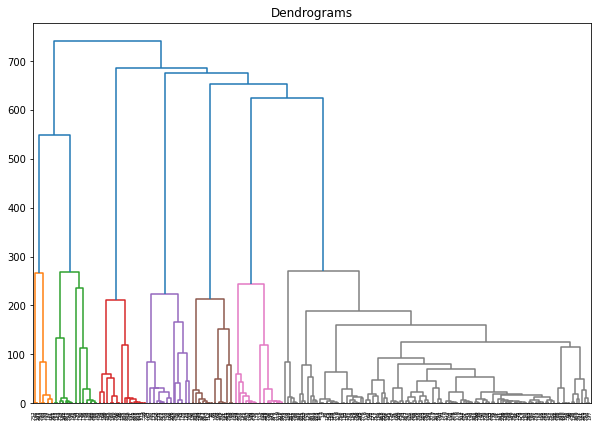

In [27]:
import scipy.cluster.hierarchy as shc
start_time = time.time()


plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(listBF, method='ward'))

print("--- time taken for Dendrograms = %s seconds ---" % (time.time() - start_time))

# Use SQL database to store the dataframe generated by the first 3 csv records  

In [ ]:
#rslt_df #checking cluster 

SyntaxError: ignored

In [ ]:
# import packages for a SQL server
#import numpy as np  
#import sqlite3 #
#from sqlalchemy import create_engine 

In [ ]:
# Using SQL = Pandas uses memory and will hold dataframes in RAM.
# The maximum storage will be equal to RAM.
# SQL on the other hand uses storage to store data.
# Use 

#1. save the clustered data to a SQL database
#2. save more incoming data to clustered database
#3. make a class solution where you can dynamically store and process these values

In [ ]:
# cav_database = create-engine
# create a connector to a database 


# Data Linkage

In [ ]:
# finding an efficient way to link the new record (from 4 and 5 ) to the existing cluster

In [28]:
#second method 
#second method - go find each cluster and find the average of the cluster 
listexp = list()
averages = dict()
for i in range(counter_clus): 
  for j in range(len(cluster_map)):       #loop through the cluster_map table
    if cluster_map.iloc[j, 0] == i:              #identify a single cluster id and store it binary record in a temporary list
      listexp.append(cluster_map.iloc[j, 1])
  res = list()
  for y in range(len(listexp[0])):
    tempList = list()
    for k in range(len(listexp)):
      flow = listexp[k].to01()
      tempList.append(int(flow[y]))
    res.append(round(mean(tempList), 6))
  averages[i] = res

# Dynamic Update - 4th and 5th datasets into the clusters


In [29]:
keep = 0
score = 0
for k, v in rec_db4.items():
  store = v[0]+ v[1]+ v[2]+ v[3]
  val4_set = [store]
  bf4 = bf.set_to_bloom_filter(val4_set)
  
  for k1 in averages.keys():
    s = ''.join(str(x) for x in averages[k1])
    if bf.calc_str_sim(bf4.to01(), s) >= score:
      keep = k1
  cluster_map.loc[len(cluster_map)+1] = [keep, bf4]

In [30]:
keep = 0
score = 0
for k, v in rec_db4.items():
  store = v[0]+ v[1]+ v[2]+ v[3]
  val5_set = [store]
  bf5 = bf.set_to_bloom_filter(val4_set)
  
  for k1 in averages.keys():
    s = ''.join(str(x) for x in averages[k1])
    if bf.calc_str_sim(bf5.to01(), s) >= score:
      keep = k1
  cluster_map.loc[len(cluster_map)+1] = [keep, bf5] 

In [31]:
len(cluster_map)

500

# The next and final step 
##### Connect the cluster map table to the other table with the record id. To produce the final cvs file (result)


In [32]:
df_all_rows = pd.concat([df1, df2, df3, df4, df5]) # 
len(df_all_rows)

500

In [33]:
cluster_col = cluster_map.cluster_id.values.tolist()

In [34]:
df_all_rows["cluster_id"] = cluster_col #//////grand total should have same clusterid with different database_id /// each cluster should have same rec_id, the cluster we have now is not pure 
df_all_rows.head()


,rec_id,database_id,Blooom_filters,cluster_id
0,04489635,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
1,03597241,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0
2,07621378,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
3,05029442,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,06845956,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2


In [35]:
df_all_rows.tail()

,rec_id,database_id,Blooom_filters,cluster_id
95,06937828,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",154
96,03331940,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",154
97,02158195,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",154
98,00406646,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",154
99,08195071,5,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",154


In [36]:
df_all_rows.to_csv('Final_result.csv', index=False)

# Testing

In [43]:
og_tab1 = pd.read_csv('ncvr_numrec_100_modrec_2_ocp_0_myp_0_nump_5.csv')
og_tab2 = pd.read_csv('ncvr_numrec_100_modrec_2_ocp_0_myp_1_nump_5.csv')
og_tab3 = pd.read_csv('ncvr_numrec_100_modrec_2_ocp_0_myp_2_nump_5.csv')
og_tab4 = pd.read_csv('ncvr_numrec_100_modrec_2_ocp_0_myp_3_nump_5.csv')
og_tab0 = pd.read_csv('ncvr_numrec_100_modrec_2_ocp_0_myp_4_nump_5.csv')

In [38]:
def remove_name(og_tab0): # a function remove_name() will rename the wrong columns allocation to the proper names and drop unnecessary columns
  og_tab0.rename(columns = {'voter_reg_num':'First Name', 
                          'name_prefix':'Last Name', 
                          'first_name': 'City', 
                          'middle_name': 'Post Code'}, inplace = True) ## Fixing name errors of original datasets 

  og_tab0.drop(og_tab0.columns[[range(5, 19)]], axis=1, inplace=True) ## dropping unnecessary columns from index: 5 to 19 

In [40]:
#remove_name(og_tab0)
remove_name(og_tab1)
remove_name(og_tab2)
remove_name(og_tab3)
remove_name(og_tab4)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [44]:
remove_name(og_tab0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [45]:
  og_tab2.head()

,rec_id,voter_reg_num,name_prefix,first_name,middle_name,last_name,name_suffix,age,gender,race,ethnic,street_address,city,state,zip_code,full_phone_num,birth_place,register_date,download_month
0,4489635,diana,libberton,hubert,28539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3597241,lillie,sullivan,raleigh,27606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7621378,sherlyn,penado,gastonia,28056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5029442,theresa,moore,chocowinity,27817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6845956,christopher,trombello,charlotte,28227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
original_df = pd.concat([og_tab1, og_tab2, og_tab3, og_tab4])

In [47]:
loop = 94
keep1 = list()
result = list()
for i in range(len(df_all_rows)):
  if df_all_rows.iloc[i, 3] == loop:
    keep1.append(int(df_all_rows.iloc[i, 0]))
for j in range(len(original_df)):
  if original_df.iloc[j, 0] in keep1:
    result.append(original_df.iloc[j, 0])

In [48]:
len(result)

4

In [49]:
result

[7696253, 7696253, 7696253, 7696253]

In [50]:
#unique value of each cluster created
result = set(result)
len(result)

1

# Dont run

In [60]:
# test don't run
wrongcount = 0
keep1 = list()
result = list()
for i in range(10):
  for k in range(len(df_all_rows)):
    if df_all_rows.iloc[k, 3] == i:
      keep1.append(int(df_all_rows.iloc[k, 0][1:]))
    for j in range(len(original_df)):
      if original_df.iloc[j, 0] in keep1:
        result.append(original_df.iloc[j, 0])
  myset = set(result)
  if len(myset) > 1:
    wrongcount += 1

In [61]:
wrongcount

10

In [ ]:
#first method
#The code below aims to get the average of all binary record for each cluster id.(using binary addition and division) 
max = cluster_map.iloc[len(cluster_map)-1, 0]
listexp = list()
loop = 0
averages = dict()
for i in range(max): 
  for j in range(len(cluster_map)): #loop through the cluster_map table
      if cluster_map.iloc[j, 0] == loop: #identify a single cluster id and store it binary record in a temporary list
        listexp.append(cluster_map.iloc[j, 1])
  sum = "0"
  div = 0
  for k in range(len(listexp)): #loop through the list created
    flow = listexp[k].to01()
    sum = bin(int(sum, 2) + int(flow, 2)) # add all binary record in that list 
    div += 1
    num = int(sum, 2) # devide the sum to get the average for each cluster id
  ans = bin(int(num/div))
  averages[loop] = ans[2:]
  loop += 1

#second method 
#second method - go find each cluster and find the average of the cluster 
listexp = list()
averages = dict()
for i in range(counter_clus): 
  for j in range(len(cluster_map)):       #loop through the cluster_map table
    if cluster_map.iloc[j, 0] == i:              #identify a single cluster id and store it binary record in a temporary list
      listexp.append(cluster_map.iloc[j, 1])
  res =LISST():
  for y in range(len(listexp[0])):
    tempList = list()
    for k in range(len(listexp)):
      flow = listexp[k].to01()
      tempList.append(int(flow[y]))
    res.append(round(mean(tempList), 6))
  averages[i] = res


keep = 0
score = 0
for k, v in rec_db4.items():
  store = v[0]+ v[1]+ v[2]+ v[3]
  val4_set = [store]
  bf4 = bf.set_to_bloom_filter(val4_set)
  
  for k1 in averages.keys():
    s = ''.join(str(x) for x in averages[k1])
    if bf.calc_str_sim(bf4.to01(), s) >= score:
      keep = k1
  cluster_map.loc[len(cluster_map)+1] = [keep, bf4] 
